# <center> Nivelamento - Data Science </center>

## Crimes em São Francisco

Utilizando o dataset de [crimes em São Francisco](https://s3-sa-east-1.amazonaws.com/lcpi/54f2b05b-1fe0-44f9-ae75-5e84fb3da81f.csv), mostre 4 gráficos que indicam as localidades dos crimes (dispersão), reproduzindo a imagem a seguir. Faça com suplots, de tal forma que exista 1 gráfico para cada período do dia (manhã, tarde, noite e madrugada). Além disso, mostre para cada categoria do crime uma cor diferente. Realize os processamentos necessários para criação dos gráficos.

**Consultas à documentação do Python, Numpy, Pandas, Matplotlib, Seaborn e Sklearn liberadas.**

![](https://s3-sa-east-1.amazonaws.com/lcpi/cabfd987-74ac-4d8e-b461-06d1837a4ee7.png)

In [1]:
# Importando as Bibliotecas.

import csv
import pandas as pd
import numpy as np

# Tive que ler o arquivo CSV com o módulo csv, por causa dos problemas com o numpy e pandas.
data = []
with open('/content/54f2b05b-1fe0-44f9-ae75-5e84fb3da81f.csv', 'r') as file:
    reader = csv.reader(file, delimiter='|')
    for row in reader:
        data.append(row)

# Converti o array NumPy em DataFrame do Pandas e visualizei as primeiras linhas.
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,periodo,resolucao
1,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.42607717737499,37.788018555829,"(37.788018555829, -122.426077177375)",16000286904134,noite,outro
2,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.47737652400299,37.764478157869505,"(37.7644781578695, -122.477376524003)",16008686306240,noite,outro
3,140776777,ASSAULT,AGGRAVATED ASSAULT WITH A GUN,Thursday,09/15/2016 12:00:00 AM,07:40,INGLESIDE,"ARREST, BOOKED",SILVER AV / CAMELLIA AV,-122.432325871028,37.7292705199592,"(37.7292705199592, -122.432325871028)",14077677704011,manha,preso
4,160004558,ASSAULT,BATTERY WITH SERIOUS INJURIES,Saturday,01/02/2016 12:00:00 AM,16:40,MISSION,NONE,VALENCIA ST / 26TH ST,-122.42035478086099,37.7489063051829,"(37.7489063051829, -122.420354780861)",16000455804136,tarde,outro


In [4]:
# Nomear as colunas corretamente e converter as coordenadas para números, e remover todas as linhas onde X ou Y são NaN.
df.columns = ['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId', 'periodo', 'resolucao'] + list(df.columns[15:])
df = df.iloc[1:] # Remove a primeira linha
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df = df.dropna(subset=['X', 'Y'])


<ipython-input-4-a712b16f2d31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X'] = pd.to_numeric(df['X'], errors='coerce')
<ipython-input-4-a712b16f2d31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y'] = pd.to_numeric(df['Y'], errors='coerce')


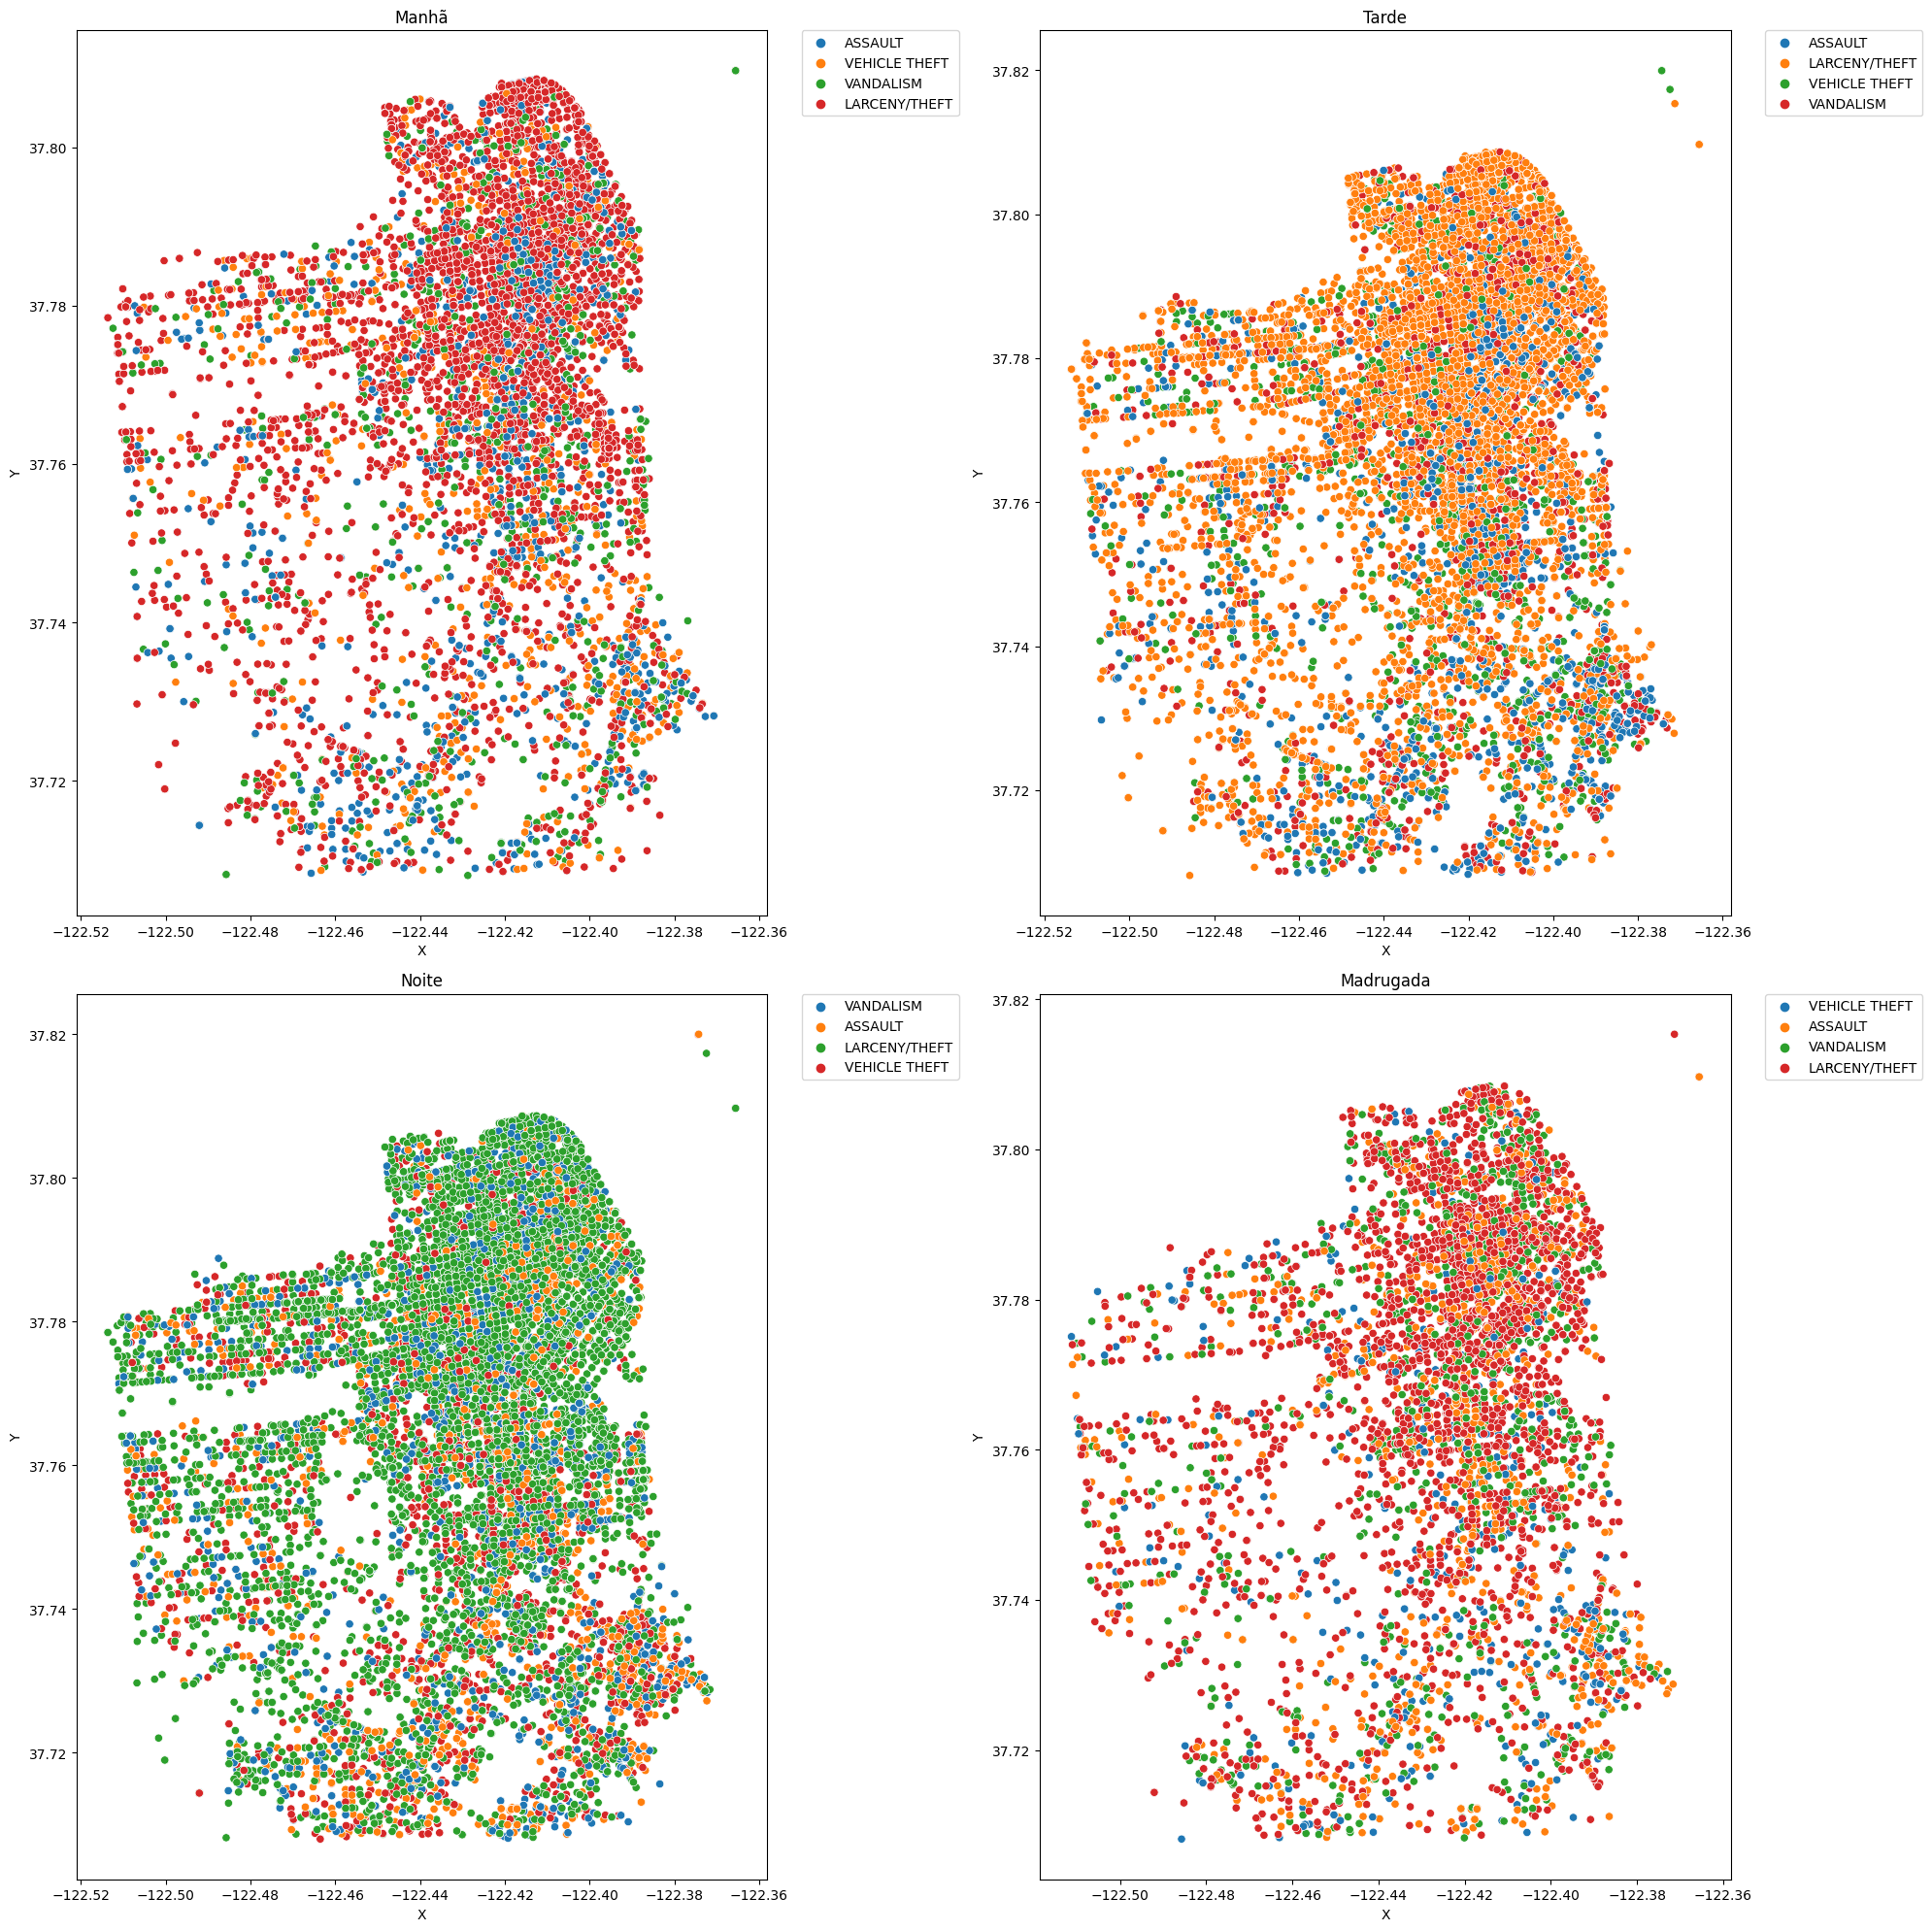

In [12]:
# Agora para criar os subplots, utilizei a função subplot do Matplotlib e criei uma função de plotagem para evitar a repetição de código.
# Como temos muitas categorias de crimes, para uma visualização mais clara, limitei as categorias de crimes.

import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(df, ax, title):
    crime_categories = df['Category'].value_counts()[:10].index.tolist() # 10 principais categorias de crimes
    df_top_crimes = df[df['Category'].isin(crime_categories)] # Filtrar o Dataframe para apenas essas categorias
    sns.scatterplot(x='X', y='Y', hue='Category', data=df_top_crimes, ax=ax, palette='tab10')
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig, axs = plt.subplots(2, 2, figsize=(20,20))

plot_scatter(df[df['periodo'] == 'manha'], axs[0, 0], 'Manhã')
plot_scatter(df[df['periodo'] == 'tarde'], axs[0, 1], 'Tarde')
plot_scatter(df[df['periodo'] == 'noite'], axs[1, 0], 'Noite')
plot_scatter(df[df['periodo'] == 'madrugada'], axs[1, 1], 'Madrugada')

plt.tight_layout()
plt.show()

## Regressão Linear  - 35 pts

Ajuste uma regressão linear, sem regularização e sem pré-processamento, usando o dataset disponível no [link](https://s3-sa-east-1.amazonaws.com/lcpi/3fbeab8b-1b87-4f2b-9c9d-c6d2b5f02564.csv), tomando as colunas EXPL_X como variáveis explicativas e a coluna RESP como variável resposta. Em seguida, assinale qual das alternativas a seguir denota as 3 variáveis que mais impactam o resultado do modelo.

**Consultas à documentação do Python, Numpy, Pandas, Matplotlib, Seaborn e Sklearn liberadas.**

- a) EXPL_10, EXPL_9, EXPL_11
- b) EXPL_15, EXPL_23, EXPL_7
- c) EXPL_10, EXPL_7, EXPL_9
- d) EXPL_12, EXPL_14, EXPL_13
- e) EXPL_9, EXPL_11, EXPL_4

In [13]:
# Importando as Bibliotecas.

import pandas as pd
from sklearn.linear_model import LinearRegression

# Carregando o dataset.
df = pd.read_csv('/content/3fbeab8b-1b87-4f2b-9c9d-c6d2b5f02564.csv')

# Separando as variáveis explicativas (EXPL_X) e a variável resposta (RESP).
X = df.loc[:, df.columns.str.startswith('EXPL_')]
y = df['RESP']

# Ajustando o modelo de regressão linear.
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
# Obtendo os coeficientes.
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

# Ordenando os coeficientes em ordem decrescente de valor absoluto.
coefficients['abs'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values('abs', ascending=False).drop('abs', axis=1)

# Imprimindo as 3 variáveis com os maiores coeficientes.
print(coefficients.head(3))

   Variable  Coefficient
10  EXPL_10    92.628742
7    EXPL_7   -77.112538
9    EXPL_9    69.611207


Alternativa C.

## Vencedor

Baseado nas tabelas, assinale a alternativa com o resultado da query descrita.

**Consulta não liberada.**

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/7dbafb1c-863b-405f-b602-ca67d927cd17.png" width="50%"/></center>

```sql
SELECT id FROM runners
WHERE id NOT IN (SELECT winner_id FROM races)
```

- a) 1 4 5
- b) 2 3 2
- c) Null
- d) John Doe; Alice Jones; Bobby Louis.
- e) 1 2 3

Alternativa A.

## PLN - 10 pts

Um dos processos de extração de features de um texto consiste em converter um documento, como o apresentado abaixo:

```
"Eu acho que ela acha que ele não acha, mas ele achou."
```

em um vetor, como:

```
(acha, acho, achou, ela, ele, eu, mas, não, que)
[2 1 1 1 2 1 1 1 2]
```

Qual é o nome desse processo?

**Consulta não liberada.**

- a) POS
- b) BOW
- c) TF-IDF
- d) Tokenization
- e) Term Frequency

Alternativa B.

## Árvores - 10 pts

Algoritmos de árvores só são utilizados para previsão, seja de variável categórica (classificação) ou contínua (regressão).

Verdadeiro ou falso? Justifique.

**Consulta não liberada.**

Falso, pois os algoritmos de árvores são geralmente usados para previsão em problemas de classificação e regressão, mas também são utilizados em outros contextos, dentre eles EDA, reduzir a dimensionalidade dos dados, detectar algumas anomalias e também aprender por reforço